# Phase-1 Selection

## Load Dataset and Select Relevant Features

In [1]:
from google.colab import files
import pandas as pd

# Upload the file and load it into a DataFrame
uploaded = files.upload()
data = pd.read_csv('AB_NYC_2019.csv')

Saving AB_NYC_2019.csv to AB_NYC_2019.csv


In [2]:
# Display the first few rows
print("First few rows of the dataset:")
display(data.head())

First few rows of the dataset:


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Inspect Columns and Select Features

In [3]:
# Inspect the columns
print("\nDataset Columns:")
print(data.columns)

# Select relevant features
selected_columns = ['neighbourhood_group', 'room_type', 'price', 'minimum_nights',
                    'number_of_reviews', 'reviews_per_month', 'availability_365']
data = data[selected_columns]

# Display summary statistics
print("\nSummary Statistics for Numerical Columns:")
display(data.describe())



Dataset Columns:
Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

Summary Statistics for Numerical Columns:


,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
count,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000
mean,152.720687,7.029962,23.274466,1.373221,112.781327
std,240.154170,20.510550,44.550582,1.680442,131.622289
min,0.000000,1.000000,0.000000,0.010000,0.000000
25%,69.000000,1.000000,1.000000,0.190000,0.000000
50%,106.000000,3.000000,5.000000,0.720000,45.000000
75%,175.000000,5.000000,24.000000,2.020000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,365.000000


# Phase-2 Preprocessing

## Check and Handle Missing Values

In [4]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Fill missing values in 'reviews_per_month' with 0
data['reviews_per_month'] = data['reviews_per_month'].fillna(0)

# Remove rows with price <= 0
data = data[data['price'] > 0]

print("\nData after handling missing values:")
print(data.isnull().sum())



Missing Values:
neighbourhood_group        0
room_type                  0
price                      0
minimum_nights             0
number_of_reviews          0
reviews_per_month      10052
availability_365           0
dtype: int64

Data after handling missing values:
neighbourhood_group    0
room_type              0
price                  0
minimum_nights         0
number_of_reviews      0
reviews_per_month      0
availability_365       0
dtype: int64


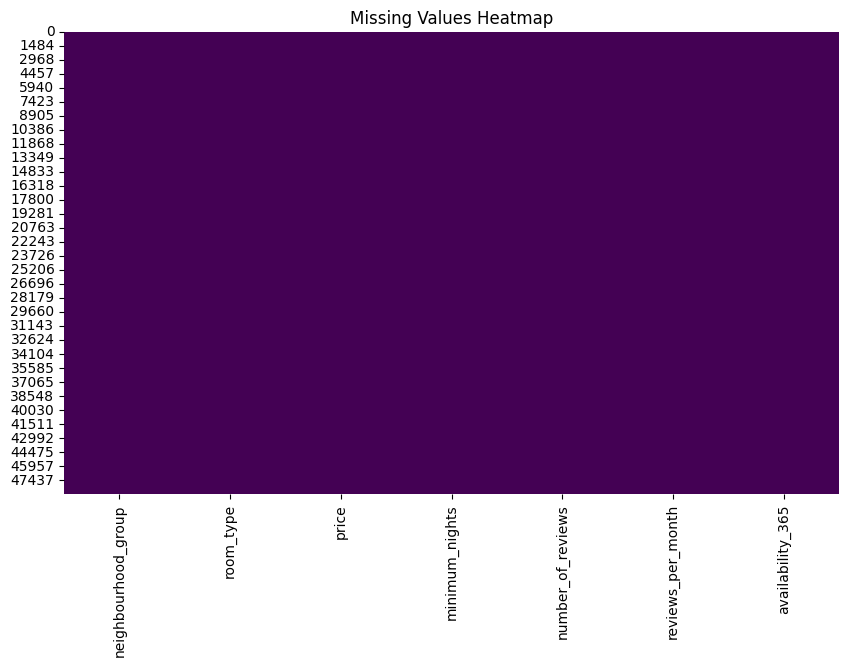


Percentage of Missing Values:
Series([], dtype: float64)


In [14]:
# Visualize missing values
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

# Percentage of missing values
missing_percentage = data.isnull().sum() / len(data) * 100
print("\nPercentage of Missing Values:")
print(missing_percentage[missing_percentage > 0])


## Target Variable Distribution (price)

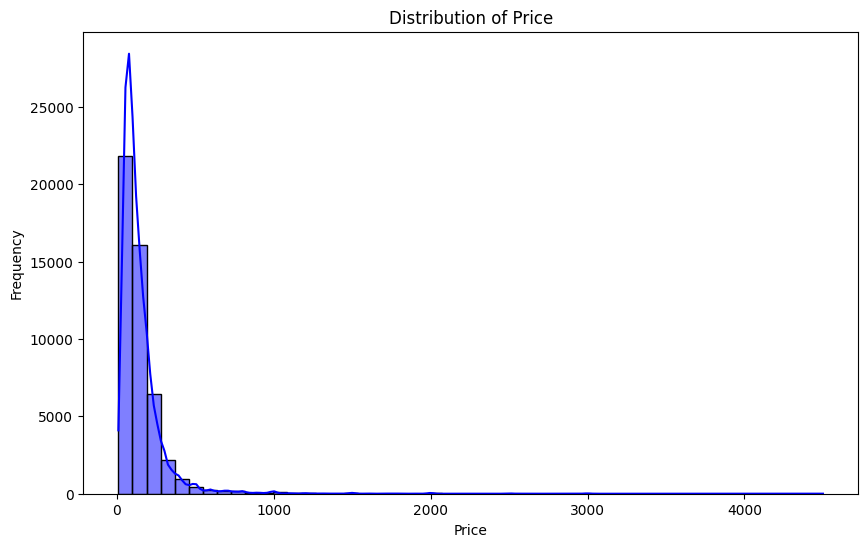

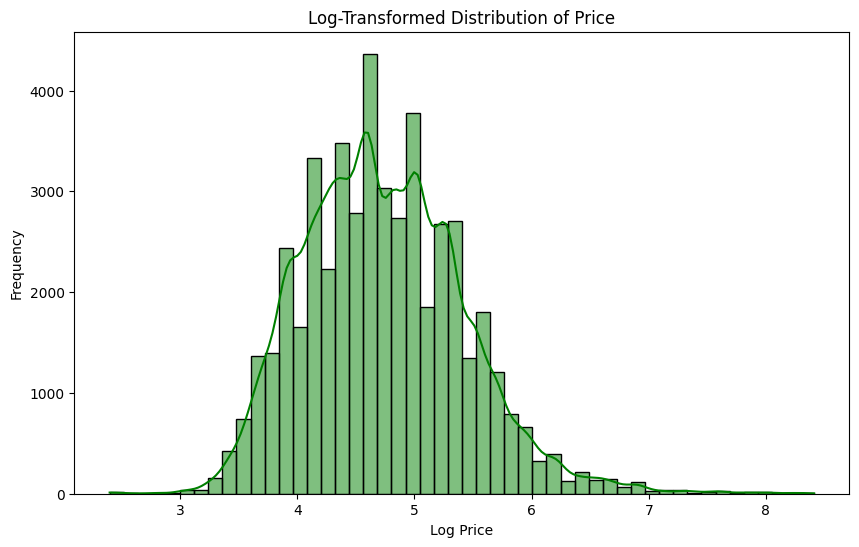

In [15]:
# Distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=50, kde=True, color='blue')
plt.title("Distribution of Price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# Log-transform price to handle skewness
import numpy as np
data['log_price'] = np.log1p(data['price'])

plt.figure(figsize=(10, 6))
sns.histplot(data['log_price'], bins=50, kde=True, color='green')
plt.title("Log-Transformed Distribution of Price")
plt.xlabel("Log Price")
plt.ylabel("Frequency")
plt.show()


## Check for Outliers and Remove Extreme Values


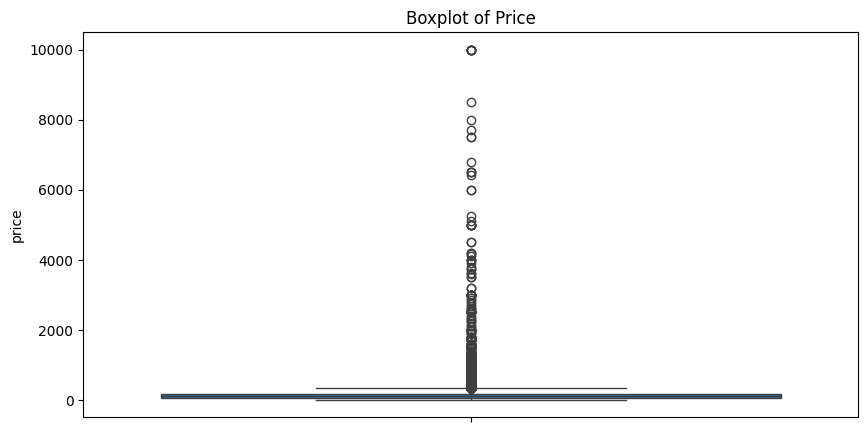

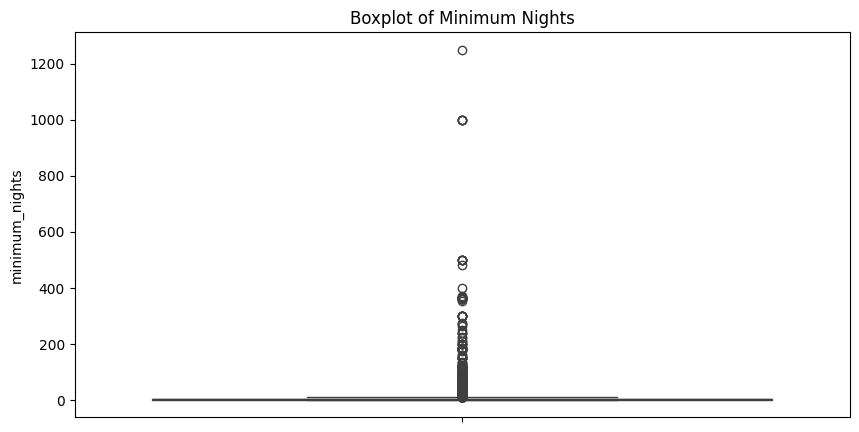

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize outliers in 'price'
plt.figure(figsize=(10, 5))
sns.boxplot(data['price'])
plt.title("Boxplot of Price")
plt.show()

# Remove outliers in 'price'
data = data[data['price'] < 5000]

# Visualize outliers in 'minimum_nights'
plt.figure(figsize=(10, 5))
sns.boxplot(data['minimum_nights'])
plt.title("Boxplot of Minimum Nights")
plt.show()

# Remove extreme values in 'minimum_nights'
data = data[data['minimum_nights'] < 365]


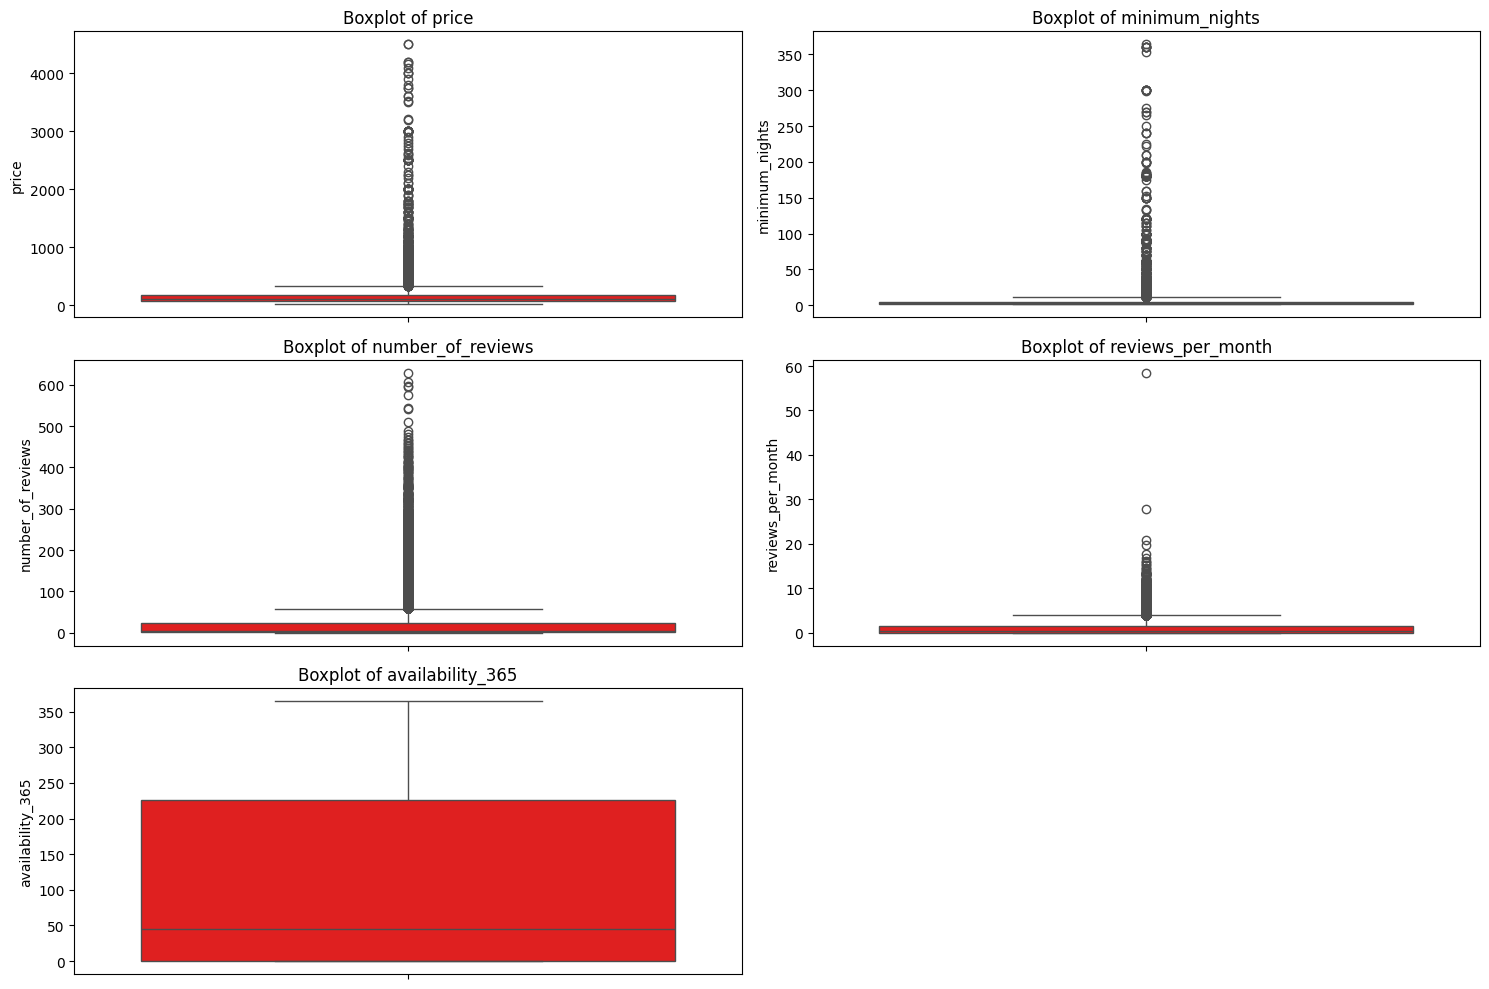

In [16]:
# Boxplots to identify outliers in numerical features
numerical_features = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(data[col], color='red')
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()


## Correlations Between Numerical Features

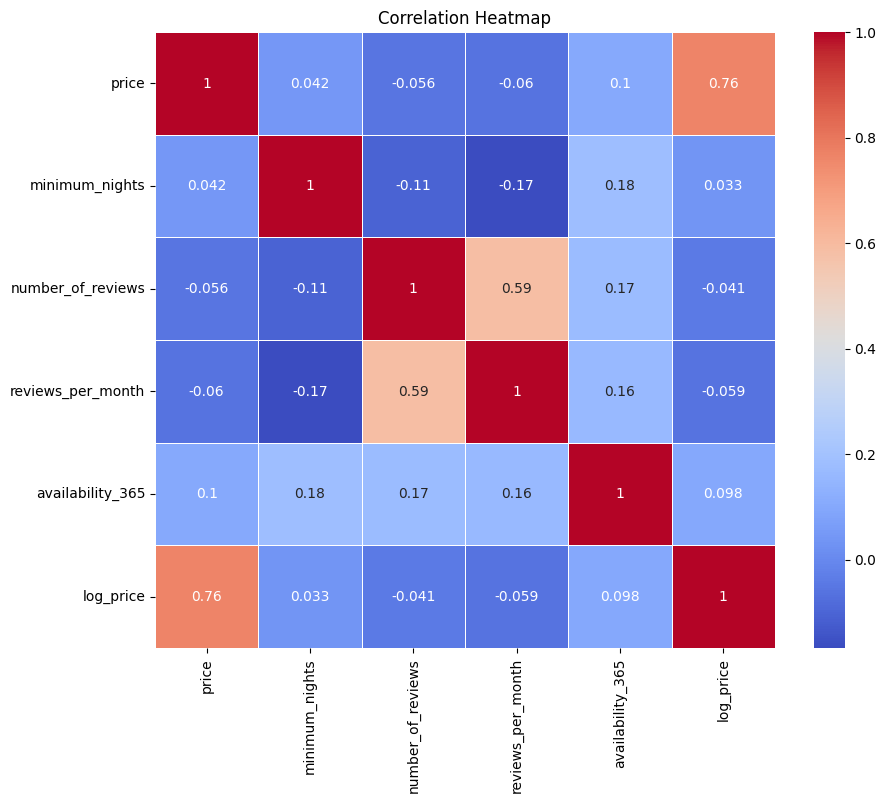

In [19]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
numerical_data = data.select_dtypes(include=['number'])
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


## Categorical Feature Exploration

<ipython-input-20-06a41bd4fe44>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['neighbourhood_group'], palette='pastel')


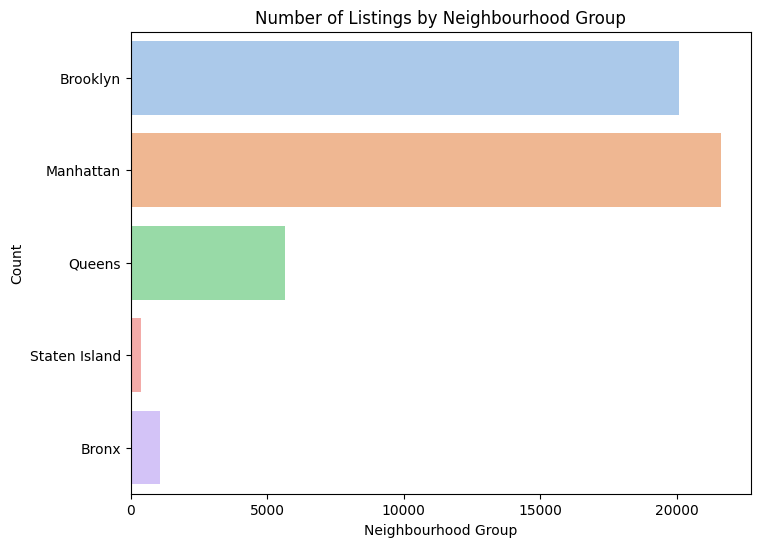

<ipython-input-20-06a41bd4fe44>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['room_type'], palette='coolwarm')


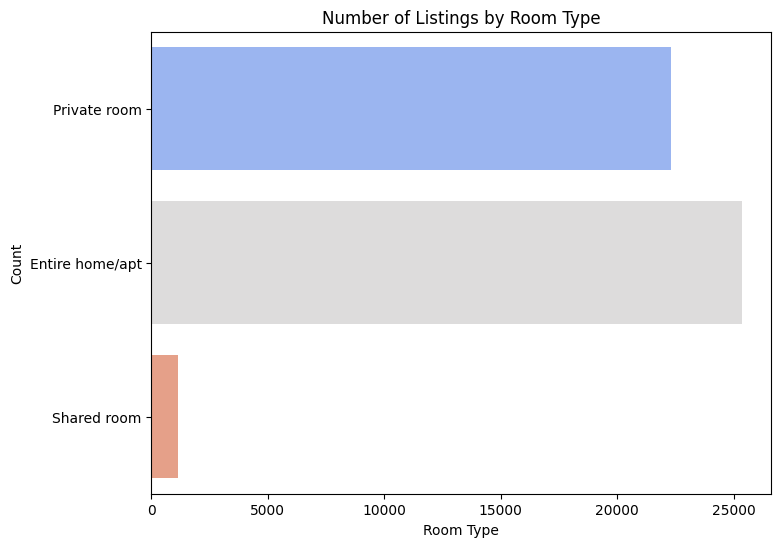

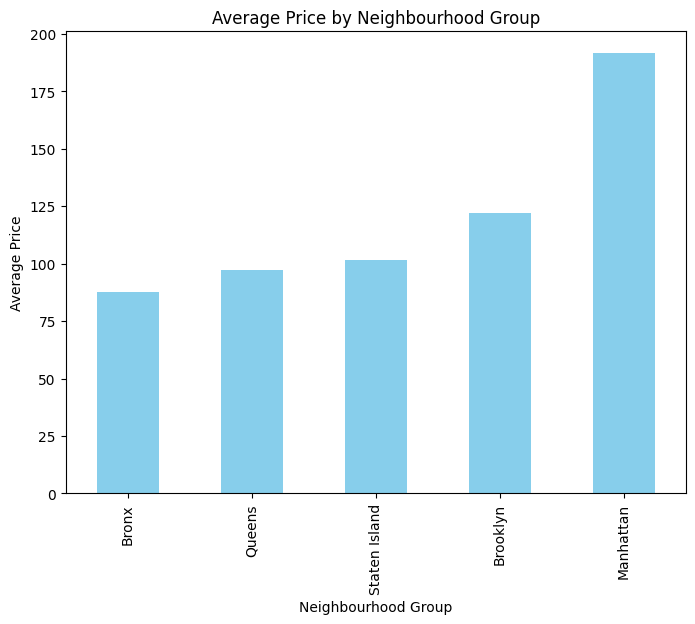

In [20]:
# Countplot for 'neighbourhood_group'
plt.figure(figsize=(8, 6))
sns.countplot(data['neighbourhood_group'], palette='pastel')
plt.title("Number of Listings by Neighbourhood Group")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Count")
plt.show()

# Countplot for 'room_type'
plt.figure(figsize=(8, 6))
sns.countplot(data['room_type'], palette='coolwarm')
plt.title("Number of Listings by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Count")
plt.show()

# Average price by neighbourhood group
avg_price_by_neighbourhood_group = data.groupby('neighbourhood_group')['price'].mean().sort_values()

plt.figure(figsize=(8, 6))
avg_price_by_neighbourhood_group.plot(kind='bar', color='skyblue')
plt.title("Average Price by Neighbourhood Group")
plt.ylabel("Average Price")
plt.xlabel("Neighbourhood Group")
plt.show()


## Exploring Relationships Between Features

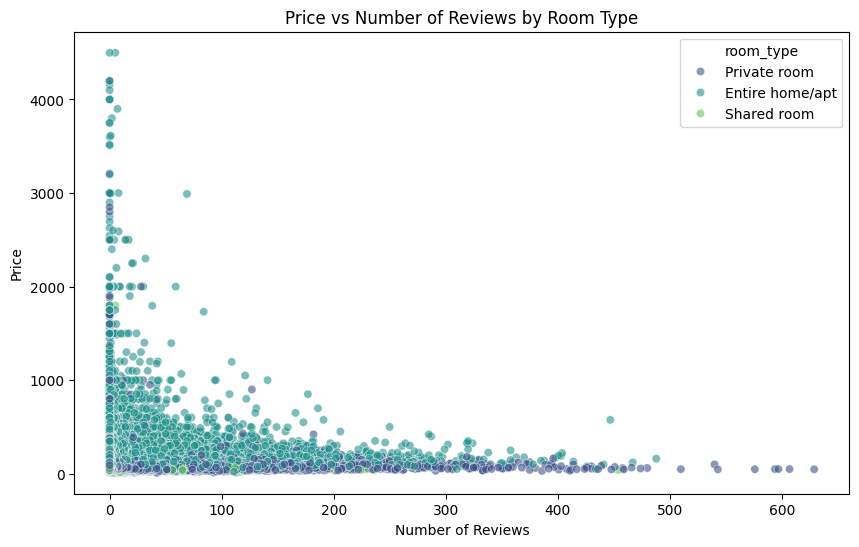

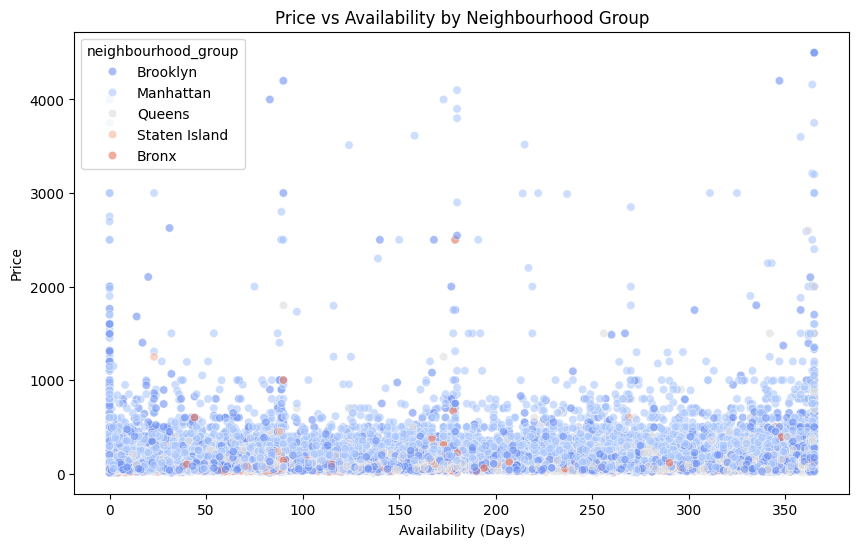

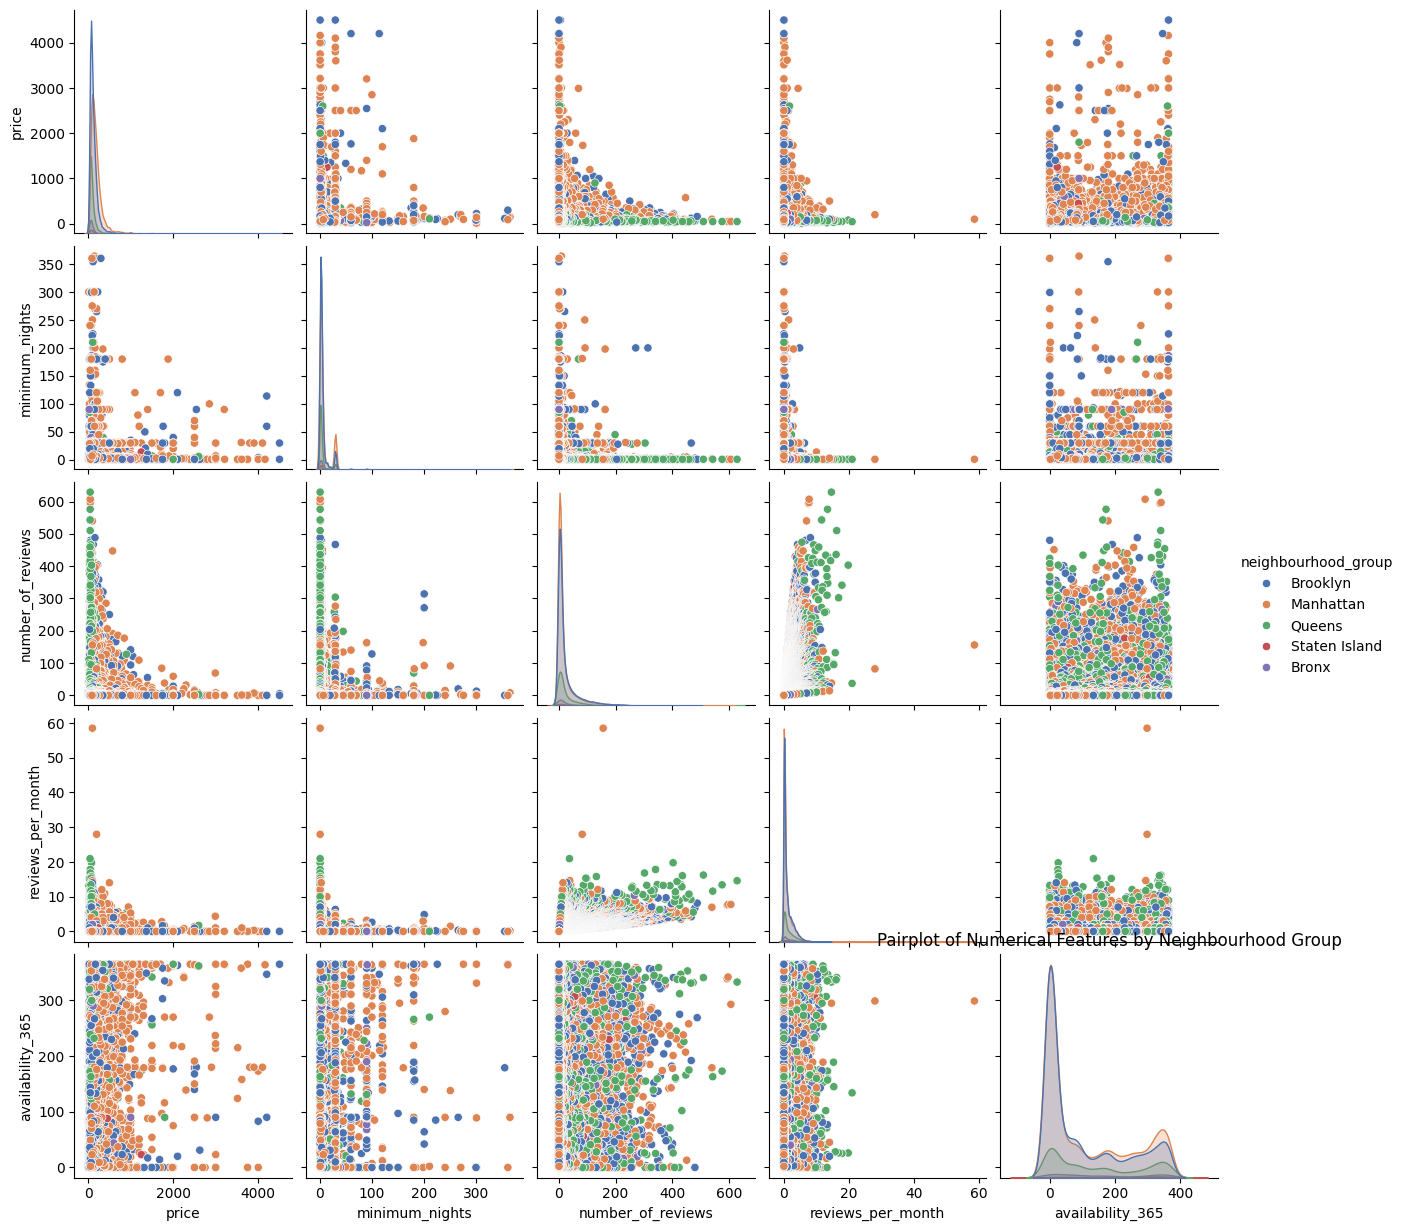

In [21]:
# Scatter plot: Price vs Number of Reviews
plt.figure(figsize=(10, 6))
sns.scatterplot(x='number_of_reviews', y='price', data=data, hue='room_type', alpha=0.6, palette='viridis')
plt.title("Price vs Number of Reviews by Room Type")
plt.xlabel("Number of Reviews")
plt.ylabel("Price")
plt.show()

# Scatter plot: Price vs Availability
plt.figure(figsize=(10, 6))
sns.scatterplot(x='availability_365', y='price', data=data, hue='neighbourhood_group', alpha=0.6, palette='coolwarm')
plt.title("Price vs Availability by Neighbourhood Group")
plt.xlabel("Availability (Days)")
plt.ylabel("Price")
plt.show()

# Pairplot for Numerical Features
sns.pairplot(data, vars=numerical_features, hue='neighbourhood_group', palette='deep')
plt.title("Pairplot of Numerical Features by Neighbourhood Group")
plt.show()


## Feature Relationships Across Categories

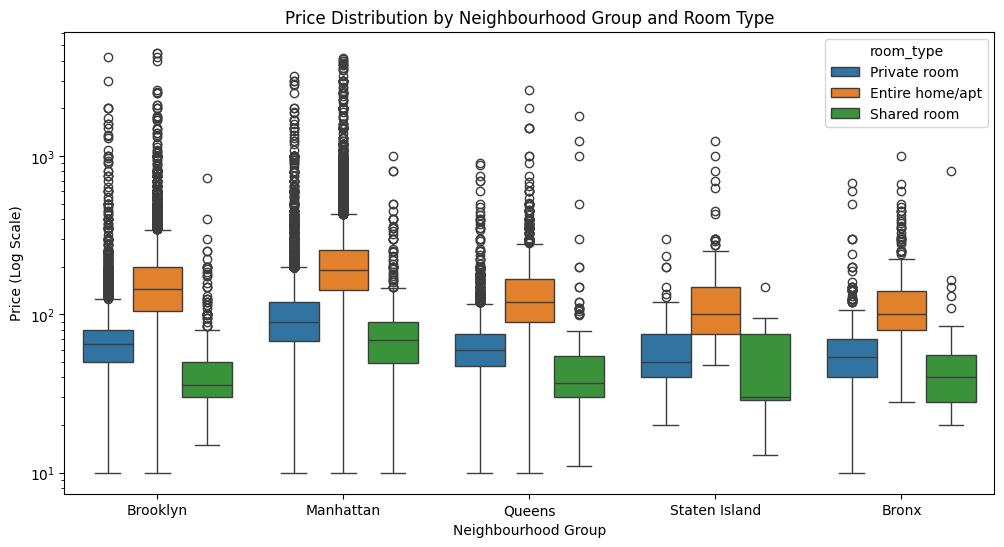

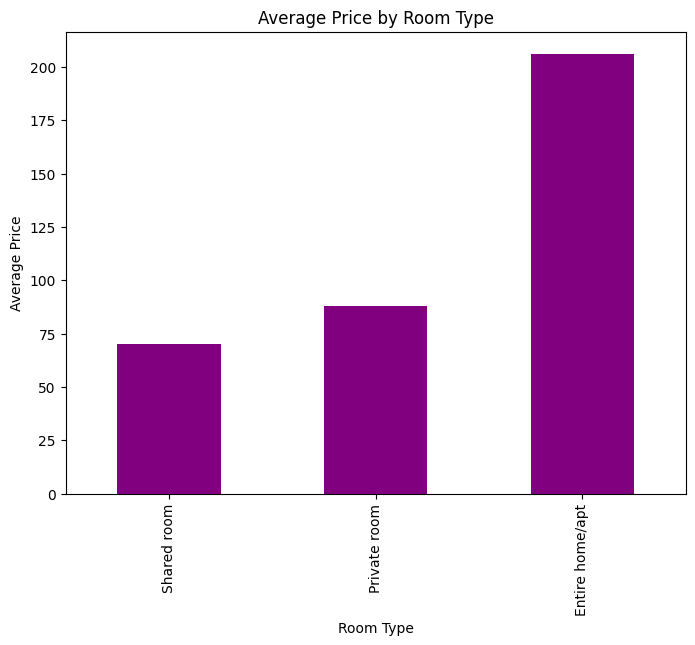

In [22]:
# Boxplot: Price by Neighbourhood Group and Room Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='neighbourhood_group', y='price', hue='room_type', data=data)
plt.yscale('log')  # Log scale for better visualization
plt.title("Price Distribution by Neighbourhood Group and Room Type")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Price (Log Scale)")
plt.show()

# Average price by room type
avg_price_by_room_type = data.groupby('room_type')['price'].mean().sort_values()

plt.figure(figsize=(8, 6))
avg_price_by_room_type.plot(kind='bar', color='purple')
plt.title("Average Price by Room Type")
plt.ylabel("Average Price")
plt.xlabel("Room Type")
plt.show()


# Phase-3 Transformation

## Split Data into Features and Target

In [6]:
# Define features (X) and target (y)
X = data.drop(columns=['price'])
y = data['price']

# Display features and target shapes
print("\nShape of Features (X):", X.shape)
print("Shape of Target (y):", y.shape)



Shape of Features (X): (48815, 6)
Shape of Target (y): (48815,)


## Encode Categorical Variables and Scale Numerical Features

In [7]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Identify categorical and numerical columns
categorical_columns = ['neighbourhood_group', 'room_type']
numerical_columns = ['minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),  # Scale numerical features
        ('cat', OneHotEncoder(), categorical_columns)  # Encode categorical features
    ]
)


## Apply Preprocessing and Split Data

In [8]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

print("\nProcessed Training Data Shape:", X_train.shape)
print("Processed Testing Data Shape:", X_test.shape)



Processed Training Data Shape: (39052, 12)
Processed Testing Data Shape: (9763, 12)


# Phase-4 Data Mining

## Train Linear Regression Model

In [9]:
from sklearn.linear_model import LinearRegression

# Train Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)


## Evaluate Linear Regression Model

In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluate Linear Regression
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("\nLinear Regression Results:")
print("MSE:", mse_lr)
print("MAE:", mae_lr)
print("R-squared:", r2_lr)



Linear Regression Results:
MSE: 24361.208528377872
MAE: 68.03396109800738
R-squared: 0.15694925956205097


## Train and Evaluate Random Forest Model

In [11]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Results:")
print("MSE:", mse_rf)
print("MAE:", mae_rf)
print("R-squared:", r2_rf)



Random Forest Results:
MSE: 27987.27564156788
MAE: 70.24743377288628
R-squared: 0.03146457512648437


## Baseline Model Evaluation

In [12]:
# Baseline Model: Predict the mean price
baseline_prediction = [y_train.mean()] * len(y_test)

# Evaluate Baseline
mse_baseline = mean_squared_error(y_test, baseline_prediction)
mae_baseline = mean_absolute_error(y_test, baseline_prediction)
r2_baseline = r2_score(y_test, baseline_prediction)

print("\nBaseline Model Results:")
print("MSE:", mse_baseline)
print("MAE:", mae_baseline)
print("R-squared:", r2_baseline)



Baseline Model Results:
MSE: 28896.67733054819
MAE: 85.43590530794414
R-squared: -6.432001806944143e-06


# Phase-5 Interpretation

## Compare Model Performance


Model Comparison:
               Model           MSE        MAE  R-squared
0           Baseline  28896.677331  85.435905  -0.000006
1  Linear Regression  24361.208528  68.033961   0.156949
2      Random Forest  27987.275642  70.247434   0.031465


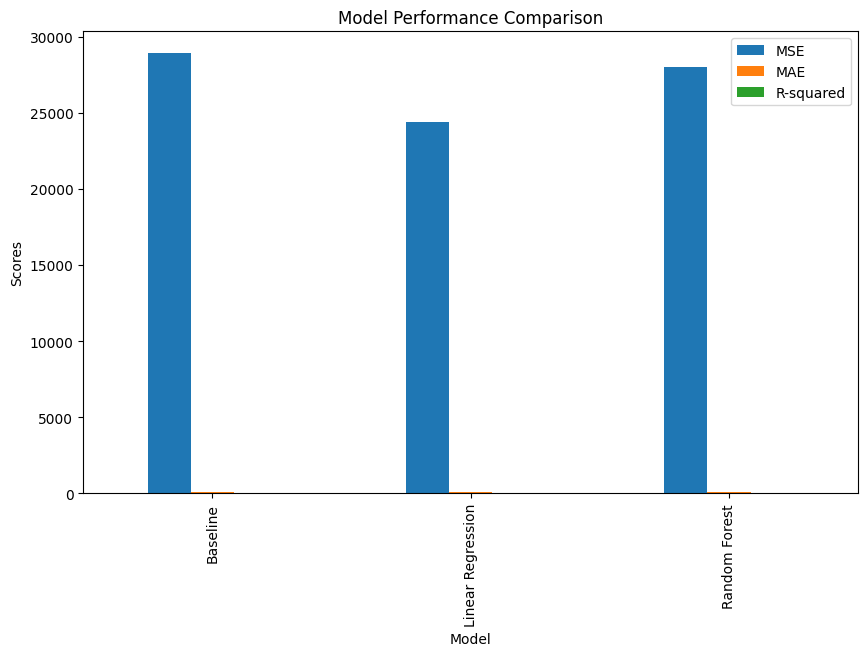

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Compare model performances
results = pd.DataFrame({
    'Model': ['Baseline', 'Linear Regression', 'Random Forest'],
    'MSE': [mse_baseline, mse_lr, mse_rf],
    'MAE': [mae_baseline, mae_lr, mae_rf],
    'R-squared': [r2_baseline, r2_lr, r2_rf]
})

print("\nModel Comparison:")
print(results)

# Plot performance comparison
results.set_index('Model').plot(kind='bar', figsize=(10, 6))
plt.title("Model Performance Comparison")
plt.ylabel("Scores")
plt.show()
